In [9]:
import os, sys
import tensorflow as tf
os.chdir('..')
join = os.path.join(os.getcwd(), '_global')
sys.path.extend([join])
from _global.config import *
from _global.funcs import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
img_path = os.path.join(DATA_PATH, "test")
c = 0
train_ds = []
train_img_paths = []
for root, dirs, files in os.walk(TEST_IMAGES, topdown=True):
   
   for name in files:
        name2 = os.path.join(root, name)
        with tf.io.gfile.GFile(name2, 'rb') as fid:
            c+=1
            if c > 5: break

            img, _ = decode_img(fid.read())
            train_ds.append(img)
            train_img_paths.append(name2)


In [ ]:
test_entry = train_ds[0]
test_entry_path = train_img_paths[0]

In [ ]:
img = test_entry.numpy()

# fig = plt.figure(figsize=(8, 8))
# for i in range(25):
#     img = mpimg.imread(train_img_paths[i])
#     fig.add_subplot()
#     plt.imshow(img)
plt.imshow(img.astype('uint8'))
# img

In [ ]:
model = tf.keras.models.load_model(OUTPUT_MODEL)

In [ ]:
model.summary()

In [ ]:
train_real = tf.expand_dims(test_entry, axis=0)

In [ ]:
train_real.shape

In [ ]:
history = model.predict(train_real)


In [ ]:
bbxs = history[0][0][0]

for i in bbxs:
    if i != 0:
        print(i)

In [11]:
import cv2

In [12]:
def show_entrie_with_bbxs(parsed_entry, window_name):
    img = parsed_entry[0]
    bbxs = parsed_entry[1]

    path = os.path.join(INSTALLATION_PATH, "testimg2222.jpeg")
            
    tf.io.write_file(path, tf.io.encode_jpeg(tf.cast(img, tf.uint8)))

    img = cv2.imread(path)
    xl = int(((len(bbxs) / 4) -1))
    print(bbxs.numpy()[:20])
    for i in range(xl):
        curr = i*4
        if bbxs[curr] == 0 and bbxs[curr+1] == 0:
            continue
        cv2.rectangle(img, (int(bbxs[curr]), int(bbxs[curr+1])), (int(bbxs[curr+2]), int(bbxs[curr+3])), (255,0,0), 2)

    cv2.imshow(window_name, img)
    cv2.moveWindow(window_name, -1920, 0)
    cv2.setWindowProperty(window_name, cv2.WND_PROP_TOPMOST, 1)


    while True:
        k = cv2.waitKey(0)
        if k == 27:
            cv2.destroyAllWindows()
            break

SparseTensor(indices=tf.Tensor([[0]], shape=(1, 1), dtype=int64), values=tf.Tensor([b'0--Parade/0_Parade_marchingband_1_849.jpg'], shape=(1,), dtype=string), dense_shape=tf.Tensor([1], shape=(1,), dtype=int64))
tf.Tensor(98, shape=(), dtype=int64)
tf.Tensor(52, shape=(), dtype=int64)
tf.Tensor(27, shape=(), dtype=int64)
tf.Tensor(23, shape=(), dtype=int64)
[98 52 27 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


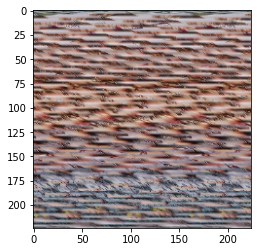

In [13]:
#testing 
c = 0
compare = tf.ones([1969])
parsed_entries = []
for ex in tf.compat.v1.python_io.tf_record_iterator(OUTPUT_TRAIN_TFRECORD):
    c+=1
    # if c < 2: continue
    if c > 50: break
    entry = parse_function(ex)
    img = plt.imshow(tf.cast(entry[0], tf.uint8).numpy())
    parsed_entries.append(entry) 
    print(entry[1][0])
    print(entry[1][1])
    print(entry[1][2])
    print(entry[1][3])

    show_entrie_with_bbxs(entry, 'Skadoskaday')    
    break


In [ ]:
path = os.path.join(INSTALLATION_PATH, "temp1234.jpeg")
with tf.io.gfile.GFile(os.path.join(TRAIN_IMAGES, "0--Parade/0_Parade_Parade_0_904.jpg"),  'rb') as fid:
    img_bytes, bbxs, _ = decode_img(fid.read(), bbxs=[[361, 98, 263, 339]], resize=True)
    print(bbxs)
    img_bytes = tf.io.encode_jpeg(tf.cast(img_bytes, tf.uint8))
    
    tf.io.write_file(path, img_bytes)